Mean Squared Error: 0.0022535163171113985
Mean Absolute Error: 0.028032048048074486
R-squared: 0.9983659341567719


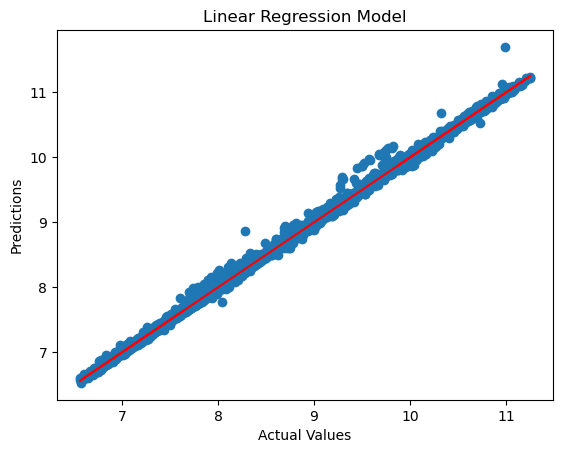

Coefficients: [-0.16160376  0.79125796  0.36729945]


In [1]:
#Regression analysis for EUR/CNY:

#The dataset is used to build regression models, such as linear regression or logistic regression

#Testing Linear Regression model.

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('file:///Users/ravi/Downloads/forexEURCNY.csv')

# Define the variables
X = data[['open', 'high', 'low']]  # independent variables
y = data['close']  # dependent variable

# Create a Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Calculate evaluation metrics
mse = mean_squared_error(y, predictions)
mae = mean_absolute_error(y, predictions)
r2 = r2_score(y, predictions)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)

# Plot the regression line
plt.scatter(y, predictions)
plt.plot(y, y, color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Linear Regression Model')
plt.show()

# Print the coefficients of the model
print('Coefficients:', model.coef_)

Accuracy: 0.8389553862894451
Precision: 0.9956521739130435
Recall: 0.6090425531914894
F1 Score: 0.7557755775577557
Accuracy: 0.8389553862894451
Precision: 0.9956521739130435
Recall: 0.6090425531914894
F1 Score: 0.7557755775577557


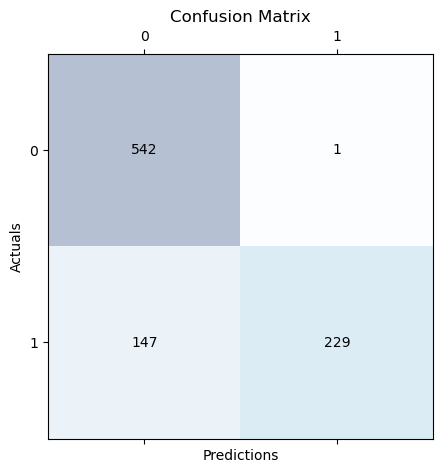

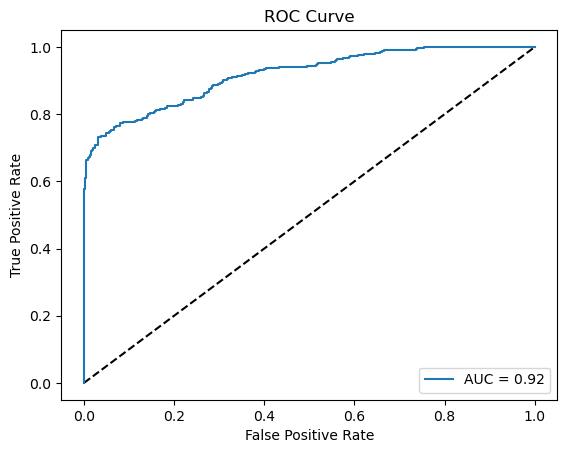

In [3]:
#Testing Logistic Regression model on the same dataset.

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Load the dataset
df = pd.read_csv("file:///Users/ravi/Downloads/forexEURCNY.csv")

# Create a new variable 'price_diff' to represent the price movement direction
df['price_diff'] = df['close'] - df['open']
df['direction'] = df['price_diff'].apply(lambda x: 1 if x > 0 else 0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['open', 'high', 'low', 'close']], df['direction'], test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model performance
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

# Print model performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

# Plot the confusion matrix
matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
ax.matshow(matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(x=j, y=i, s=matrix[i, j], va='center', ha='center')

plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix')
plt.show()

# Plot the ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()